In [1]:
from pathlib import Path

import skimage
from skimage import io
from skimage.transform import resize
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.filters import unsharp_mask
%matplotlib inline

In [2]:
def unsharpmask_amount(fileID, band):
    fires = io.imread(fileID);
    firstChannel = np.squeeze(fires[:,:,0])
    height, width = firstChannel.shape
    smallFires = resize(firstChannel, (round(height/2), round(width/2)))*255
    blurryFires = resize(smallFires, (height, width))
    details = firstChannel - blurryFires
    image = blurryFires
    image = (1.0/255.0)*image
    
    table = []
    amount = 1
    while amount <= 2:
        result_1 = unsharp_mask(image, radius=1, amount=1)
        abs_error = abs(firstChannel-result_1)
        mean = abs_error.mean()
        table.append({'Filename': fileID,'Band': band,'Amount': amount, 'Mean Error': mean})
        amount = amount + .1
    
    return pd.DataFrame(table)

In [6]:
unsharpmask_amount('TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_20181115_170218_cali.tif','07')

,Filename,Band,Amount,Mean Error
0,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,1.0,93.599572
1,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,1.1,93.599572
2,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,1.2,93.599572
3,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,1.3,93.599572
4,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,1.4,93.599572
5,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,1.5,93.599572
6,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,1.6,93.599572
7,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,1.7,93.599572
8,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,1.8,93.599572
9,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,1.9,93.599572


In [7]:
# creates a table out of all the c14 files
dfc14 = pd.concat((unsharpmask_amount(file, '14') for file in Path('TIFF_Files/CampFire/').glob('GOES-17_ABI_RadC_C14*')))

In [8]:
#creates a table out of all the c07 files
dfc07 = pd.concat((unsharpmask_amount(file, '07') for file in Path('TIFF_Files/CampFire/').glob('GOES-17_ABI_RadC_C07*')))

In [9]:
df_all = pd.concat([dfc14, dfc07])

In [10]:
df_all

,Filename,Band,Amount,Mean Error
0,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,1.0,104.303940
1,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,1.1,104.303940
2,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,1.2,104.303940
3,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,1.3,104.303940
4,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,1.4,104.303940
...,...,...,...,...
5,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,1.5,85.341116
6,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,1.6,85.341116
7,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,1.7,85.341116
8,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,1.8,85.341116


In [13]:
df = df_all
df.groupby(['Band', 'Amount']).mean().reset_index()

,Band,Amount,Mean Error
0,07,1.0,83.722748
1,07,1.1,83.722748
2,07,1.2,83.722748
3,07,1.3,83.722748
4,07,1.4,83.722748
5,07,1.5,83.722748
6,07,1.6,83.722748
7,07,1.7,83.722748
8,07,1.8,83.722748
9,07,1.9,83.722748


<AxesSubplot:xlabel='Amount'>

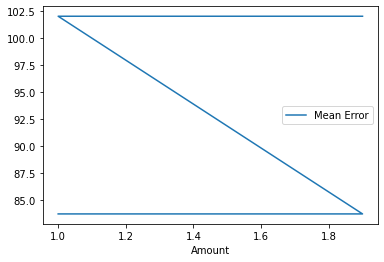

In [15]:
df.groupby(['Band', 'Amount']).mean().reset_index().plot('Amount','Mean Error')